In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
df.shape

(583, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

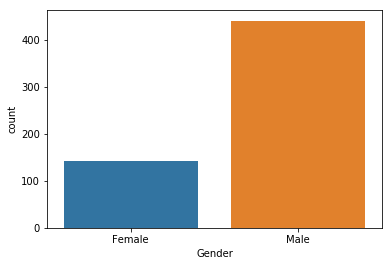

In [18]:
import seaborn as sb
sb.countplot(df['Gender'],label="Count")   #or sb.countplot(x='Gender',data=df)
plt.show()

In [19]:
#conversion of object datatype to numeric

df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
df['Gender'].unique()

array([1, 0], dtype=int64)

In [20]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [24]:
df.fillna(-1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [26]:
#Spliting the dataset into a training set and a testing set

x=df.drop('Gender',axis=1)
y=df['Gender']

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(408, 10)
(408,)
(175, 10)
(175,)


In [27]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K – Nearest Neighbour Classifier is {:.2f}' .format(model_KNN.score(x_test,y_test)))

Accuracy of K – Nearest Neighbour Classifier is 0.73


In [28]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of Logistic Regression is 0.75


In [29]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier().fit(x_train,y_train)
print("Accuracy of Random Forest Classifier is {:.2f}" .format(model_rf.score(x_test,y_test)))

Accuracy of Random Forest Classifier is 0.77


In [30]:
#Support Vector Machine (SVM) Classifier

from sklearn.svm import SVC

model_svm=SVC().fit(x_train,y_train)
print("Accuracy of Support Vector Machine Classifier is {:.2f}" .format(model_svm.score(x_test,y_test)))

Accuracy of Support Vector Machine Classifier is 0.75


In [31]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier().fit(x_train,y_train)
print("Accuracy of Decision Tree Classifier is {:.2f}" .format(model_dt.score(x_test,y_test)))

Accuracy of Decision Tree Classifier is 0.73


In [32]:
#Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB().fit(x_train,y_train)
print("Accuracy of Gaussian Naive Bayes Classifier is {:.2f}" .format(model_gnb.score(x_test,y_test)))

Accuracy of Gaussian Naive Bayes Classifier is 0.34


In [33]:
#Gradient Boosting Regressor 

from sklearn.ensemble import GradientBoostingRegressor

model_gbr=GradientBoostingRegressor().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_gbr.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.08


In [34]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model_ab=AdaBoostClassifier().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_ab.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.74


In [35]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda=LinearDiscriminantAnalysis().fit(x_train,y_train)
print('Accuracy of Linear Discriminant Analysis is {:.2f}' .format(model_lda.score(x_test,y_test)))

Accuracy of Linear Discriminant Analysis is 0.75


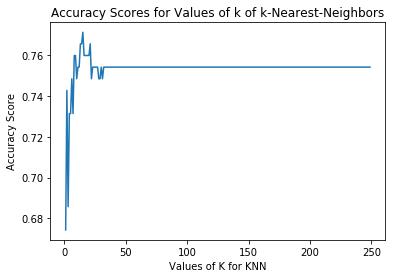

KNN gives Maximum Accuracy is 0.7714285714285715 and least value of K for maximum accuracy is 15


In [36]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

# experimenting with different k values on which KNN gives more accurate result
score=[]
k_range=range(1,250)
A_max=0
k_best=1

for k in k_range:
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    accu_knn=model_knn.score(x_test,y_test)
    score.append(accu_knn)
    if(A_max<accu_knn):
        A_max=accu_knn
        k_best=k
        
plt.plot(k_range,score)
plt.xlabel('Values of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
 
print('KNN gives Maximum Accuracy is {0} and least value of K for maximum accuracy is {1}' .format(A_max,k_best))